<a id=top-page></a>
# Toy example of assessing functions with varying regressibility

In this notebook, we perform an illustrative example and test how does the cost function, $\mathcal{L}$, behave on three functions with varying regressibility.

Given only one-dimensional manifold parameterized by $\eta$, the first function, $\phi_1 = \sqrt{\eta}$, is expected to be easiest to regress as it is unique and composed of a relatively smooth gradient along $\eta$. The second function, $\phi_2 = 1 / (1 + e^{-\eta})$, introduces region with a steep gradient and is thus expected to be more difficult to regress than $\phi_1$. The third function, $\phi_3$, computed such that $\eta = \phi_3^3 + 5 \phi_3^2 - 2 \phi_3$, is expected to be impossible to regress accurately, since it introduces non-uniqueness in the $\eta$ coordinates. The discrete grid in $\eta$ coordinates is computed from random samples from a bounded interval, to avoid having exactly overlapping data points in the $\phi_3$ case. 

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
bandwidth_values = np.logspace(-7, 2, 400)
penalty = 'log-sigma-over-peak'
norm = 'max'
power = 1
vertical_shift = 1

In [3]:
n_points = 1000

### Easily regressible function, $\phi_1(\eta)$

In [4]:
np.random.seed(seed=random_seed)
x_1 = np.sort(np.random.random((n_points,)) * (100-2) + 2)
y_1 = np.sqrt(x_1)
x_1_scaled, _, _ = preprocess.center_scale(x_1[:,None], scaling='0to1')
y_1_scaled, _, _ = preprocess.center_scale(y_1[:,None], scaling='0to1')

variance_data_1 = analysis.compute_normalized_variance(x_1[:,None], 
                                                     y_1[:,None], 
                                                     depvar_names=['var'], 
                                                     bandwidth_values=bandwidth_values)

N_1 = variance_data_1.normalized_variance

derivative_1, sigma_1, _ = analysis.normalized_variance_derivative(variance_data_1)


cost_1 = analysis.cost_function_normalized_variance_derivative(variance_data_1,
                                                             penalty_function=penalty,
                                                             power=power,
                                                             norm=norm,
                                                             integrate_to_peak=False)

### Function with a steep gradient, $\phi_2(\eta)$

In [5]:
np.random.seed(seed=random_seed)
x_2 = np.sort(np.random.random((n_points,)) * (50+50) - 50)
y_2 = 1./(1 + np.exp(-x_2))
x_2_scaled, _, _ = preprocess.center_scale(x_2[:,None], scaling='0to1')
y_2_scaled, _, _ = preprocess.center_scale(y_2[:,None], scaling='0to1')

variance_data_2 = analysis.compute_normalized_variance(x_2[:,None], 
                                                     y_2[:,None], 
                                                     depvar_names=['var'], 
                                                     bandwidth_values=bandwidth_values)

N_2 = variance_data_2.normalized_variance

derivative_2, sigma_2, _ = analysis.normalized_variance_derivative(variance_data_2)

cost_2 = analysis.cost_function_normalized_variance_derivative(variance_data_2,
                                                             penalty_function=penalty,
                                                             power=power,
                                                             norm=norm,
                                                             integrate_to_peak=False)

### Function with non-uniqueness, $\phi_3(\eta)$

In [6]:
np.random.seed(seed=random_seed)
y_3 = np.sort(np.random.random((n_points,)) * (3+6) - 6)
x_3 = y_3**3 + 5*y_3**2 -2*y_3
x_3_scaled, _, _ = preprocess.center_scale(x_3[:,None], scaling='0to1')
y_3_scaled, _, _ = preprocess.center_scale(y_3[:,None], scaling='0to1')

variance_data_3 = analysis.compute_normalized_variance(x_3[:,None], 
                                                     y_3[:,None], 
                                                     depvar_names=['var'], 
                                                     bandwidth_values=bandwidth_values)

N_3 = variance_data_3.normalized_variance

derivative_3, sigma_3, _ = analysis.normalized_variance_derivative(variance_data_3)


cost_3 = analysis.cost_function_normalized_variance_derivative(variance_data_3,
                                                             penalty_function=penalty,
                                                             power=power,
                                                             norm=norm,
                                                             integrate_to_peak=False)

***

## Visualize $\phi(\eta)$, $\mathcal{N}(\sigma)$ and $\hat{\mathcal{D}}(\sigma)$

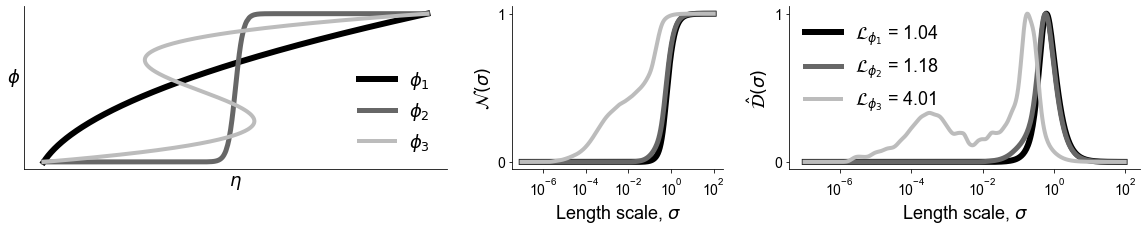

In [7]:
fig = plt.figure(figsize=(20, 3))
widths = [1.2, 0.6, 1]
heights = [1]
spec = fig.add_gridspec(ncols=3, nrows=1, width_ratios=widths, height_ratios=heights)

ax = fig.add_subplot(spec[0,0])
plt.plot(x_1_scaled, y_1_scaled, 'k-', lw=6, label='$\phi_1$')
plt.plot(x_2_scaled, y_2_scaled, '-', color='#676767', lw=5, label='$\phi_2$')
plt.plot(x_3_scaled, y_3_scaled, '-', color='#bcbcbc' , lw=4, label='$\phi_3$')
plt.xlabel('$\eta$', fontsize=18)
plt.ylabel('$\phi$', fontsize=18, rotation=0, horizontalalignment='right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([],fontsize=14)
plt.yticks([],fontsize=14);
plt.legend(frameon=False, fontsize=18, loc='lower right')

ax = fig.add_subplot(spec[0,1])
plt.semilogx(bandwidth_values, N_1['var'], 'k', lw=6, label='$\mathcal{L}_{\phi_1}$ = ' + str(round(cost_1,2)))
plt.semilogx(bandwidth_values, N_2['var'], '#676767', lw=5, label='$\mathcal{L}_{\phi_2}$ = ' + str(round(cost_2,2)))
plt.semilogx(bandwidth_values, N_3['var'], '#bcbcbc', lw=4, label='$\mathcal{L}_{\phi_3}$ = ' + str(round(cost_3,2)))
plt.xlabel('Length scale, $\sigma$', fontsize=18)
plt.ylabel('$\mathcal{N}(\sigma)$', fontsize=18)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks([0,1], fontsize=14)
# plt.legend(frameon=False, fontsize=18, loc='upper left')

ax = fig.add_subplot(spec[0,2])
plt.semilogx(sigma_1, derivative_1['var'], 'k', lw=6, label='$\mathcal{L}_{\phi_1}$ = ' + str(round(cost_1,2)))
plt.semilogx(sigma_2, derivative_2['var'], '#676767', lw=5, label='$\mathcal{L}_{\phi_2}$ = ' + str(round(cost_2,2)))
plt.semilogx(sigma_3, derivative_3['var'], '#bcbcbc', lw=4, label='$\mathcal{L}_{\phi_3}$ = ' + str(round(cost_3,2)))
plt.xlabel('Length scale, $\sigma$', fontsize=18)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=18)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks([0,1], fontsize=14)
plt.legend(frameon=False, fontsize=18, loc='upper left')

plt.savefig('../figures/three-functions-with-varying-regressibility.png', dpi=300, bbox_inches='tight')

***